Labb del 2: Solens upp och nedgång

 Uppgift 2a
Gradtal: 11
Max diff p1-p2: 1.73e-06
Max diff p1-p3: 1.73e-06
Max diff p2-p3: 9.04e-11


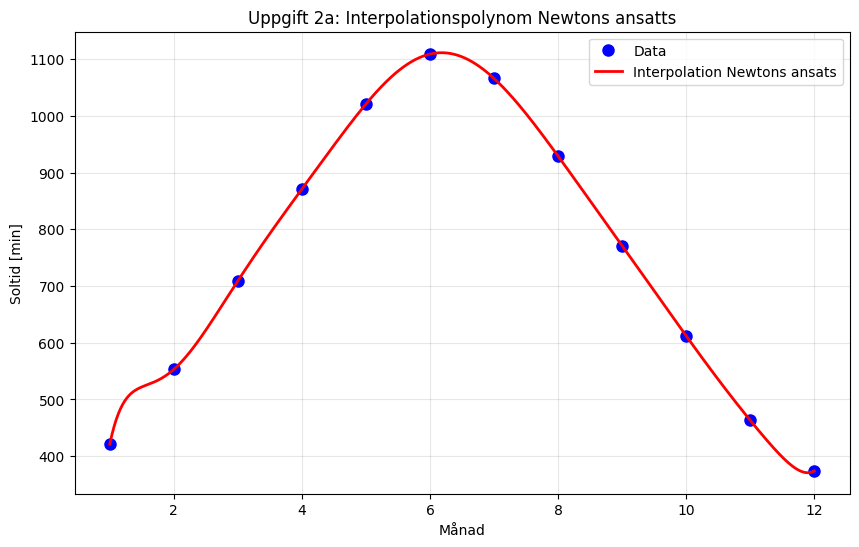


 Uppgift 2b
Konditionstalet för naiv ansats:      11605354492676928
Konditionstalet för centrerad ansats: 495102791
Konditionstalet för Newtons ansats:   217010224

 Uppgift 2c
Minstakvadratfel: 262.91


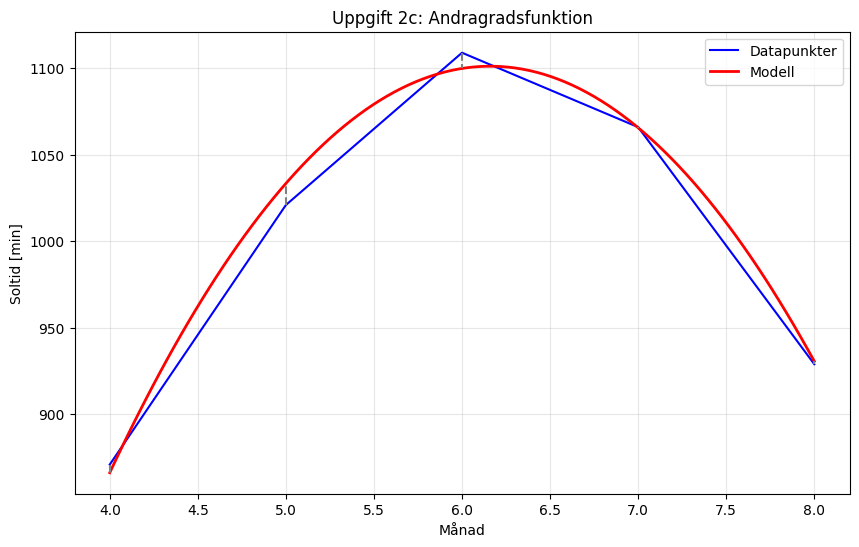


 Uppgift 2d
Minstakvadratfel: 160.51


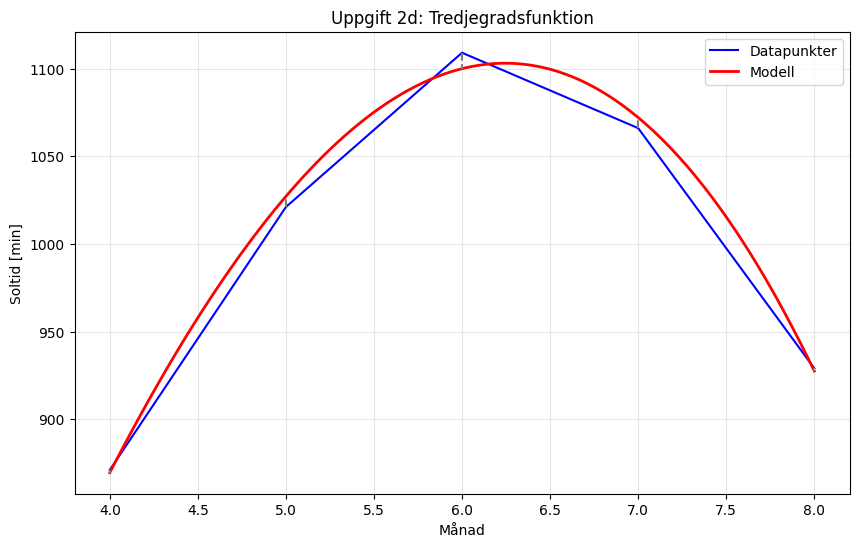


 Uppgift 2e
Minstakvadratfel: 1806.14


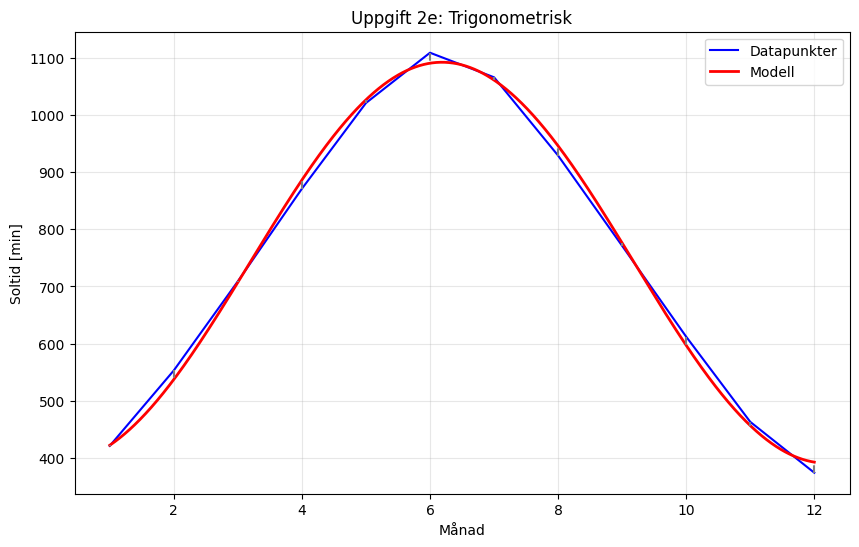


 Uppgift 2f
Konditionstalet för B_c (grad 2):        1200127
Konditionstalet för B_d (grad 3):        2305585680
Konditionstalet för B_e (trigonometrisk): 2


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 27 11:54:10 2026

@author: hannah ekendahl

Uppgift 2: Solens upp- och nedgång
"""

import numpy as np
import matplotlib.pyplot as plt
import os

def clear_console():
    os.system('clear')

t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
soltid = np.array([421, 553, 709, 871, 1021, 1109, 1066, 929, 771, 612, 463, 374])
t_april_aug = t[3:8]
soltid_april_aug = soltid[3:8]
t_eval = np.linspace(1, 12, 1000)

def Vander(x, n=None): # Från myvanderapp.py, skapar matris
    if n is None:
        n = len(x)
    m = len(x)
    V = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            V[i, j] = x[i]**j
    return V

def newton_interpolation_matrix(x):
    n = len(x)
    matrix = np.zeros((n, n))
    matrix[:, 0] = 1 # Den första kolumnen ger 1:or!
    for j in range(1, n):
        for i in range(j, n):
            matrix[i, j] = matrix[i, j-1] * (x[i] - x[j-1])
    return matrix

def evaluera_naiv_ansats(c, t):
    return sum(c[i] * t**i for i in range(len(c)))

def evaluera_centrerad_ansats(c, t, t_medel):
    return sum(c[i] * (t - t_medel)**i for i in range(len(c)))

def evaluera_newton_ansats(c, t_punkter, t):
    p = np.zeros_like(t, dtype=float)
    for k in range(len(c)):
        term = c[k]
        for j in range(k):
            term *= (t - t_punkter[j])
        p += term
    return p

def minstakvadratfel(data, modell):
    return np.sum((data - modell)**2)

def konditionstal(A):
    Anorm = np.linalg.norm(A, ord=np.inf)
    Ainv = np.linalg.inv(A)
    Ainvnorm = np.linalg.norm(Ainv, ord=np.inf)
    return Anorm * Ainvnorm

def plotta_med_residualer(t_data, y_data, t_eval, p_eval, p_data, titel):
    """Plottning med residualer """
    plt.figure(figsize=(10, 6))
    plt.plot(t_data, y_data, 'b', markersize=8, label='Datapunkter')
    plt.plot(t_eval, p_eval, 'r-', linewidth=2, label='Modell')
    for ti, yi, ypi in zip(t_data, y_data, p_data):
        plt.plot([ti, ti], [yi, ypi], color='gray', linestyle='--')
    plt.grid(True, alpha=0.3)
    plt.xlabel('Månad')
    plt.ylabel('Soltid [min]')
    plt.title(titel)
    plt.legend()
    plt.show()


# Deluppgift a: Interpolation tre olika varianter 
def uppgift_2a():
    print("\n Uppgift 2a")
    print(f"Gradtal: {len(t)-1}")
    
    # Naiv ansats, V=Vandermondematris, 
    V_naiv = Vander(t)
    c_naiv = np.linalg.solve(V_naiv, soltid)
    
    # Centrerad ansats
    t_medel = np.mean(t)
    V_cent = Vander(t - t_medel)
    c_cent = np.linalg.solve(V_cent, soltid)
    
    # Newtons ansats
    A_newton = newton_interpolation_matrix(t)
    c_newton = np.linalg.solve(A_newton, soltid)
    
    # Evaluering 
    p1 = evaluera_naiv_ansats(c_naiv, t_eval)
    p2 = evaluera_centrerad_ansats(c_cent, t_eval, t_medel)
    p3 = evaluera_newton_ansats(c_newton, t, t_eval)
    
    print(f"Max diff p1-p2: {np.max(np.abs(p1-p2)):.2e}")
    print(f"Max diff p1-p3: {np.max(np.abs(p1-p3)):.2e}")
    print(f"Max diff p2-p3: {np.max(np.abs(p2-p3)):.2e}")
    
    # Plottning
    plt.figure(figsize=(10, 6))
    plt.plot(t, soltid, 'bo', markersize=8, label='Data')
    plt.plot(t_eval, p3, 'r-', linewidth=2, label='Interpolation Newtons ansats')
    plt.grid(True, alpha=0.3)
    plt.xlabel("Månad")
    plt.ylabel("Soltid [min]")
    plt.title("Uppgift 2a: Interpolationspolynom Newtons ansatts")
    plt.legend()
    plt.show()
    
    return V_naiv, V_cent, A_newton


# Deluppgift b: Konditionstal
def uppgift_2b(V_naiv, V_cent, A_newton):
    print("\n Uppgift 2b")
    
    kond_naiv = konditionstal(V_naiv)
    kond_cent = konditionstal(V_cent)
    kond_newton = konditionstal(A_newton)
    
    print(f"Konditionstalet för naiv ansats:      {int(kond_naiv)}")
    print(f"Konditionstalet för centrerad ansats: {int(kond_cent)}")
    print(f"Konditionstalet för Newtons ansats:   {int(kond_newton)}")


# Deluppgift c: Andragradsfunktion
def uppgift_2c():
    print("\n Uppgift 2c")
    A = Vander(t_april_aug, 3)
    B = A.T @ A                    
    b = A.T @ soltid_april_aug     
    c = np.linalg.solve(B, b)     
    
    t_eval = np.linspace(t_april_aug[0], t_april_aug[-1], 100)
    p_eval = c[0] + c[1]*t_eval + c[2]*t_eval**2
    p_data = c[0] + c[1]*t_april_aug + c[2]*t_april_aug**2
    
    fel = minstakvadratfel(soltid_april_aug, p_data)
    print(f"Minstakvadratfel: {fel:.2f}")
    
    plotta_med_residualer(t_april_aug, soltid_april_aug, t_eval, p_eval, p_data, 
                          "Uppgift 2c: Andragradsfunktion")
    return A


# Deluppgift d: Tredjegradsfunktion 
def uppgift_2d():
    print("\n Uppgift 2d")
    A = Vander(t_april_aug, 4)
    B = A.T @ A                    
    b = A.T @ soltid_april_aug     
    c = np.linalg.solve(B, b)    
    
    t_eval = np.linspace(t_april_aug[0], t_april_aug[-1], 100)
    p_eval = c[0] + c[1]*t_eval + c[2]*t_eval**2 + c[3]*t_eval**3
    p_data = c[0] + c[1]*t_april_aug + c[2]*t_april_aug**2 + c[3]*t_april_aug**3
    
    fel = minstakvadratfel(soltid_april_aug, p_data)
    print(f"Minstakvadratfel: {fel:.2f}")
    
    plotta_med_residualer(t_april_aug, soltid_april_aug, t_eval, p_eval, p_data,
                          "Uppgift 2d: Tredjegradsfunktion")
    return A


# Deluppgift e: Trigonometrisk 
def uppgift_2e():
    print("\n Uppgift 2e")
    omega = 2 * np.pi / 12
    
    A = np.zeros((len(t), 3))
    A[:, 0] = 1
    A[:, 1] = np.cos(omega * t)
    A[:, 2] = np.sin(omega * t)
    
    B = A.T @ A                   
    b = A.T @ soltid     
    d = np.linalg.solve(B, b)    
    
    t_eval = np.linspace(1, 12, 1000)
    p_eval = d[0] + d[1]*np.cos(omega*t_eval) + d[2]*np.sin(omega*t_eval)
    p_data = d[0] + d[1]*np.cos(omega*t) + d[2]*np.sin(omega*t)
    
    fel = minstakvadratfel(soltid, p_data)
    print(f"Minstakvadratfel: {fel:.2f}")
    
    plotta_med_residualer(t, soltid, t_eval, p_eval, p_data,
                          'Uppgift 2e: Trigonometrisk')
    return A

# Deluppgift f:
def uppgift_2f(A_c, A_d, A_e):
    print("\n Uppgift 2f")
    B_c = A_c.T @ A_c
    B_d = A_d.T @ A_d
    B_e = A_e.T @ A_e
    
    kond_c = konditionstal(B_c)
    kond_d = konditionstal(B_d)
    kond_e = konditionstal(B_e)
    
    print(f"Konditionstalet för B_c (grad 2):        {int(kond_c)}")
    print(f"Konditionstalet för B_d (grad 3):        {int(kond_d)}")
    print(f"Konditionstalet för B_e (trigonometrisk): {int(kond_e)}")

# Huvudprogramet
def main():
    clear_console()
    print("Labb del 2: Solens upp och nedgång")
    
    V_naiv, V_cent, A_newton = uppgift_2a()
    uppgift_2b(V_naiv, V_cent, A_newton)
    A_c = uppgift_2c()
    A_d = uppgift_2d()
    A_e = uppgift_2e()
    uppgift_2f(A_c, A_d, A_e)
    
    
if __name__ == "__main__":
    main()